In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [3]:
cols=['fLength', 'fWidth', 'fSize', 'fConc', 'fConcl', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv('magic04.data', names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [5]:
df['class'] = (df['class'] == 'g').astype(int)

In [6]:
df.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


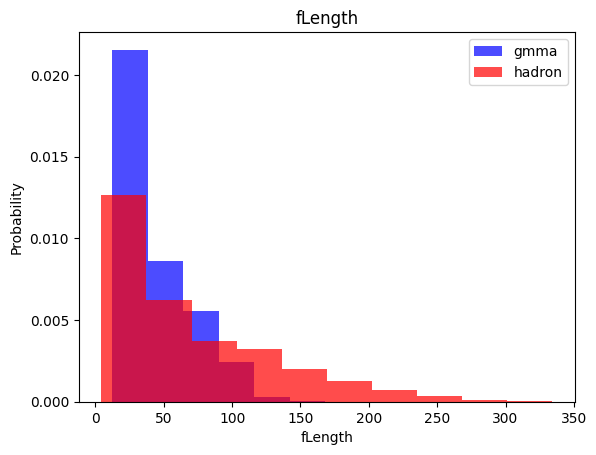

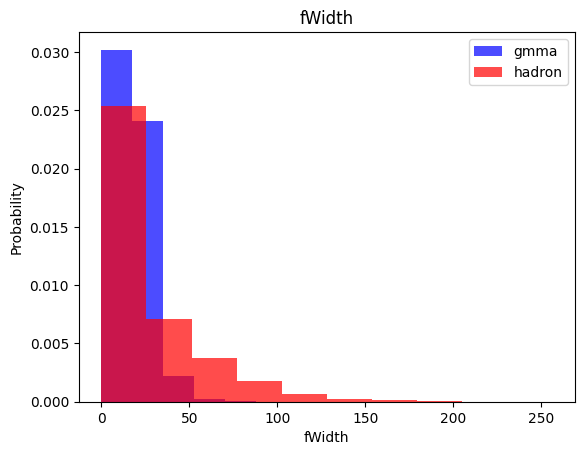

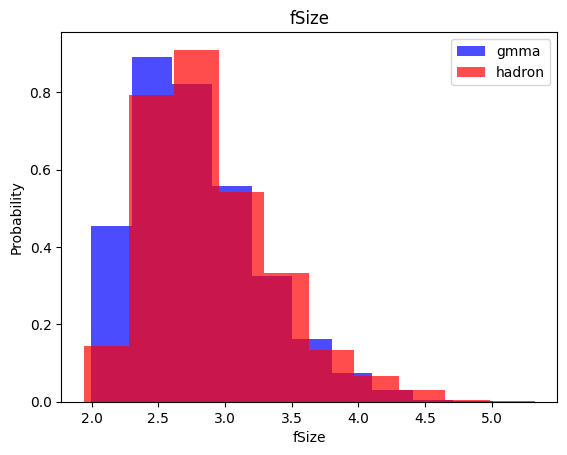

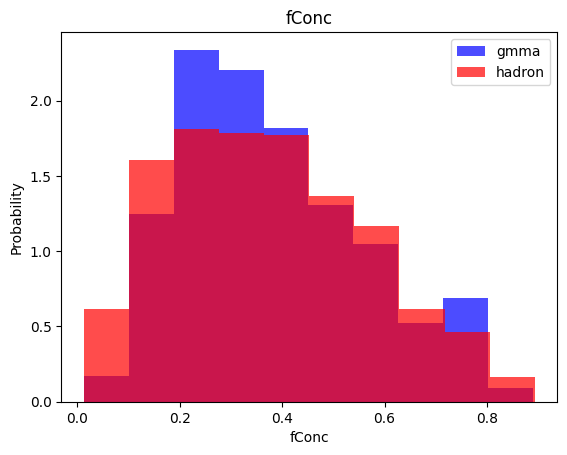

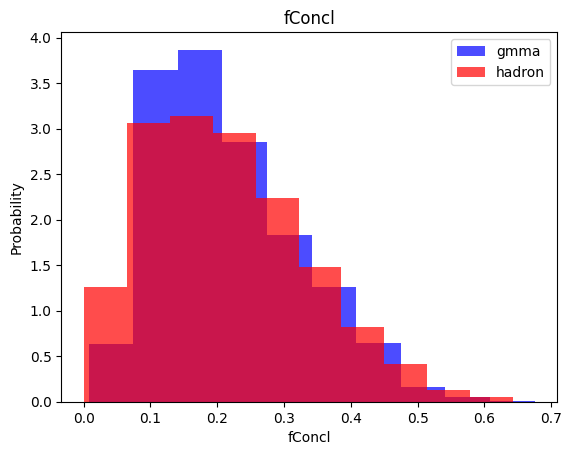

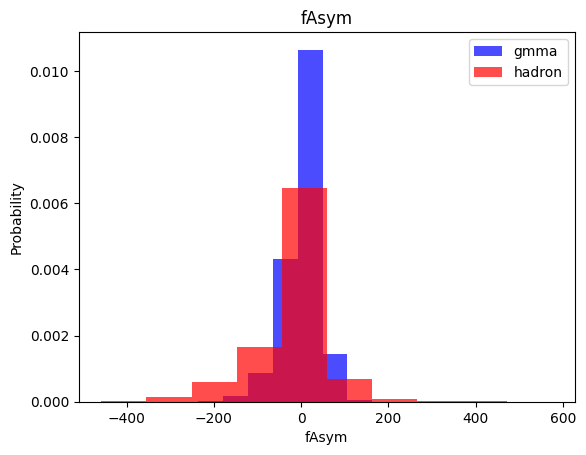

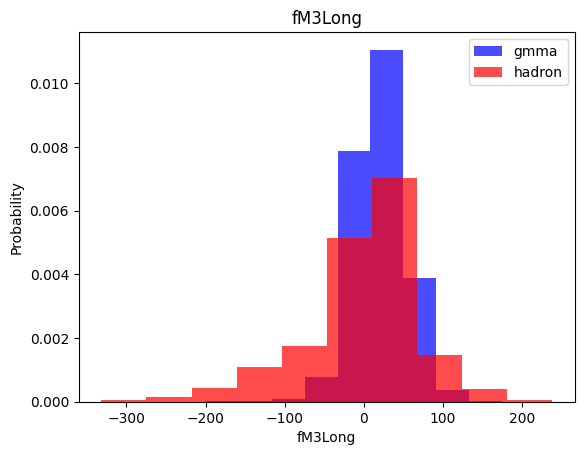

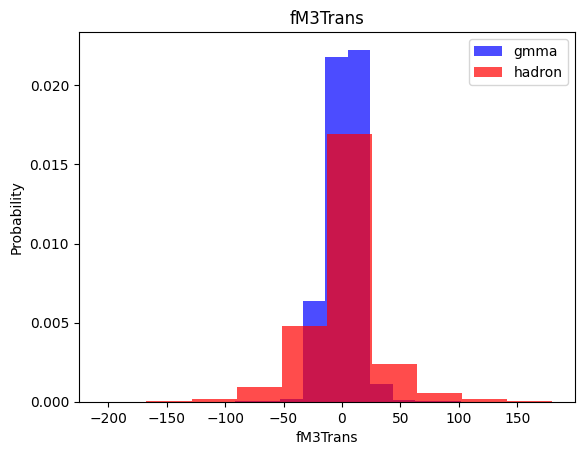

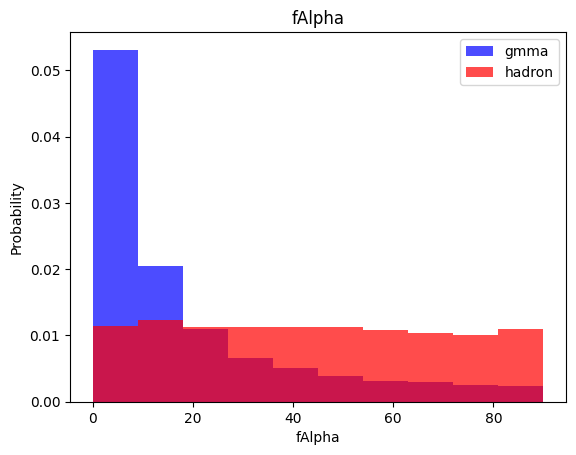

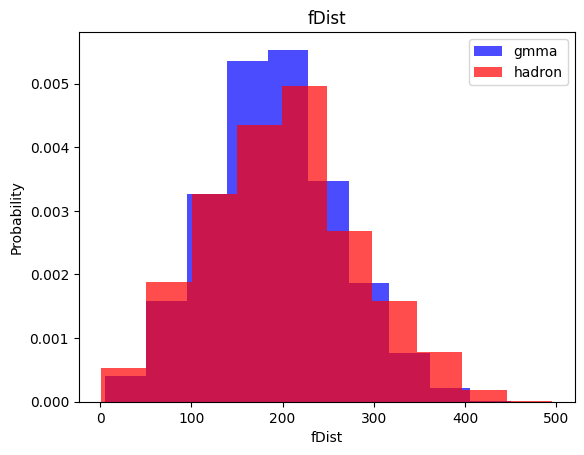

In [8]:
for label in cols[:-1]:
    plt.hist(df[df['class']==1][label],color='blue',label='gmma',alpha=0.7,density=True)
    plt.hist(df[df['class']==0][label],color='red',label='hadron',alpha=0.7,density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [30]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

D:\miniconda3\envs\LZPMPC005\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [15]:
def scale_dataset(dataframe):
    X=dataframe[dataframe.cols[:-1]].values
    y=dataframe[dataframe.cols[-1]].values

    scaler=StandardScaler()
    X=scaler.fit_transform(X)
    data = np.hstack((X, np.reshape(y,(-1,1))))

    return data, X, y

In [18]:
print(len(train[train['class']==1]))
print(len(train[train['class']==0]))

7411
4001


In [20]:
from imblearn.over_sampling import RandomOverSampler

In [24]:
def scale_dataset(dataframe, oversample=False):
    X=dataframe[dataframe.columns[:-1]].values
    y=dataframe[dataframe.columns[-1]].values

    scaler=StandardScaler()
    X=scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X,y = ros.fit_resample(X,y)
    
    data = np.hstack((X, np.reshape(y,(-1,1))))

    return data, X, y

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [31]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [35]:
y_pred = knn_model.predict(X_test)

In [36]:
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [37]:
y_test

array([0, 1, 1, ..., 1, 0, 1])

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71      1338
           1       0.83      0.88      0.85      2466

    accuracy                           0.80      3804
   macro avg       0.79      0.77      0.78      3804
weighted avg       0.80      0.80      0.80      3804



In [42]:
from sklearn.naive_bayes import GaussianNB

In [43]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [44]:
y_pred = nb_model.predict(X_test)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.38      0.49      1338
           1       0.73      0.90      0.80      2466

    accuracy                           0.72      3804
   macro avg       0.70      0.64      0.64      3804
weighted avg       0.71      0.72      0.69      3804



In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lg_model = LogisticRegression().fit(X_train, y_train)
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69      1338
           1       0.84      0.81      0.82      2466

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



In [49]:
from sklearn.svm import SVC

In [50]:
svm_model = SVC().fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1338
           1       0.89      0.90      0.89      2466

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



In [54]:
import tensorflow as tf

In [74]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,2))
    ax1.plot(history.history['loss'],label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)
    
    ax2.plot(history.history['accuracy'],label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    
    plt.show()

In [67]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10, )),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                    metrics=['accuracy'])
    history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
)
    return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


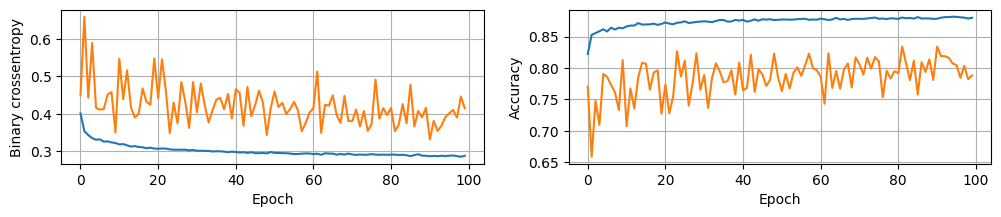

119/119 [==============================] - 0s 723us/step - loss: 0.3057 - accuracy: 0.8757
16 nodes, dropout 0, lr 0.01, batch size 64


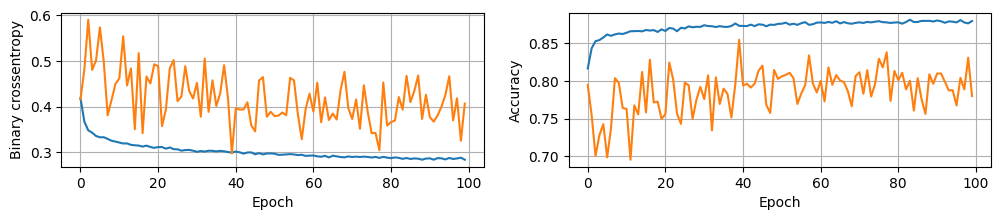

119/119 [==============================] - 0s 657us/step - loss: 0.3026 - accuracy: 0.8751
16 nodes, dropout 0, lr 0.01, batch size 128


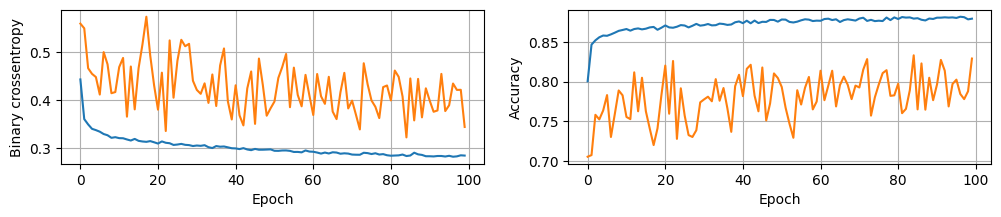

119/119 [==============================] - 0s 743us/step - loss: 0.3041 - accuracy: 0.8762
16 nodes, dropout 0, lr 0.005, batch size 32


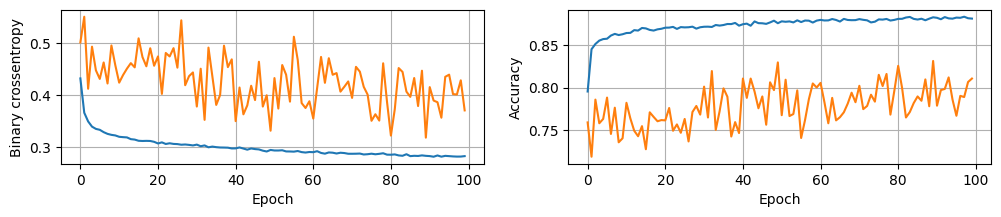

119/119 [==============================] - 0s 863us/step - loss: 0.3138 - accuracy: 0.8725
16 nodes, dropout 0, lr 0.005, batch size 64


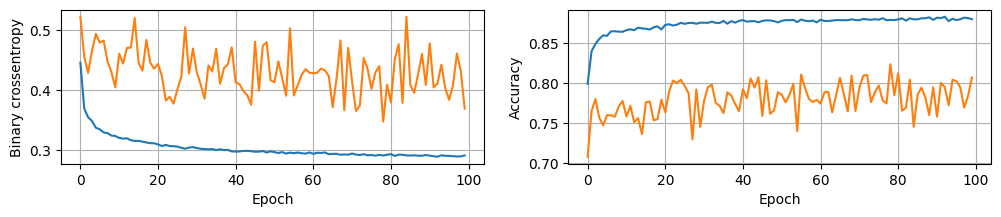

119/119 [==============================] - 0s 965us/step - loss: 0.3135 - accuracy: 0.8715
16 nodes, dropout 0, lr 0.005, batch size 128


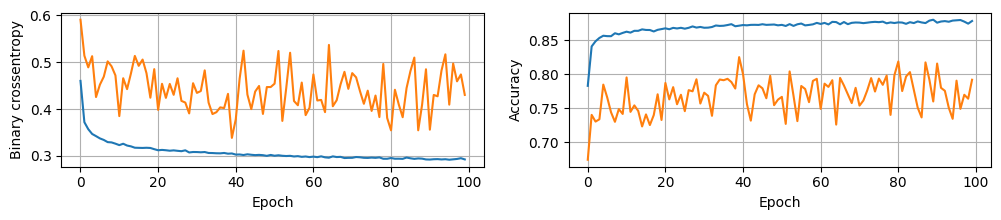

119/119 [==============================] - 0s 910us/step - loss: 0.2991 - accuracy: 0.8812
16 nodes, dropout 0, lr 0.001, batch size 32


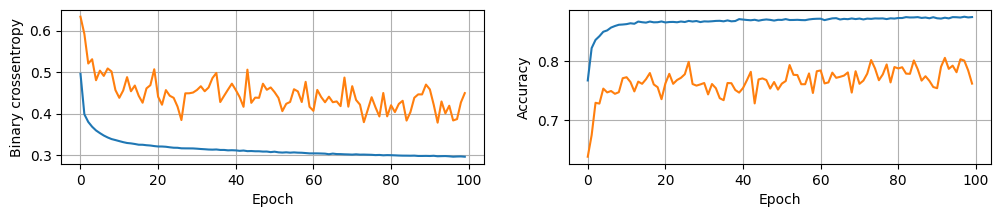

119/119 [==============================] - 0s 787us/step - loss: 0.2998 - accuracy: 0.8793
16 nodes, dropout 0, lr 0.001, batch size 64


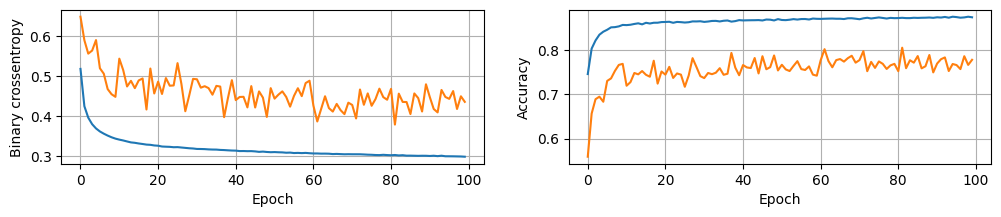

119/119 [==============================] - 0s 740us/step - loss: 0.2951 - accuracy: 0.8807
16 nodes, dropout 0, lr 0.001, batch size 128


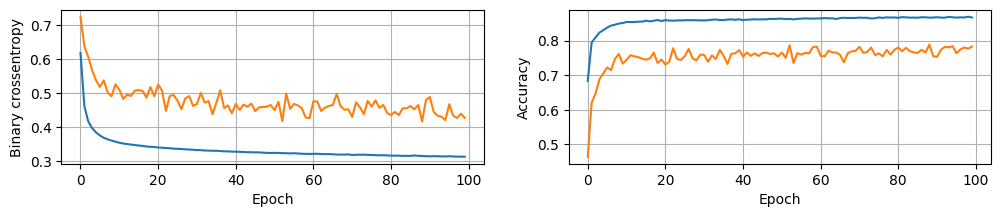

119/119 [==============================] - 0s 748us/step - loss: 0.3036 - accuracy: 0.8736
16 nodes, dropout 0.2, lr 0.01, batch size 32


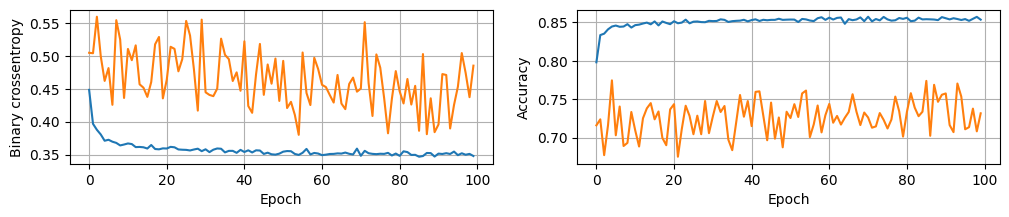

119/119 [==============================] - 0s 727us/step - loss: 0.3149 - accuracy: 0.8743
16 nodes, dropout 0.2, lr 0.01, batch size 64


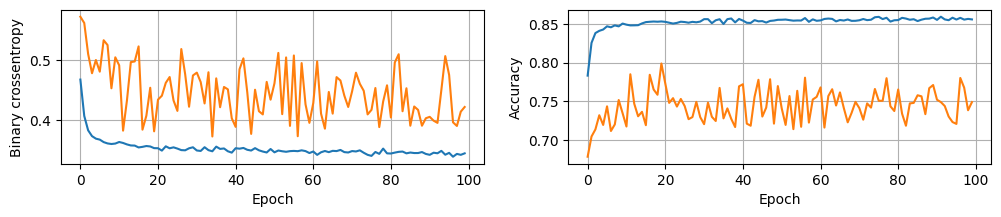

119/119 [==============================] - 0s 759us/step - loss: 0.3062 - accuracy: 0.8799
16 nodes, dropout 0.2, lr 0.01, batch size 128


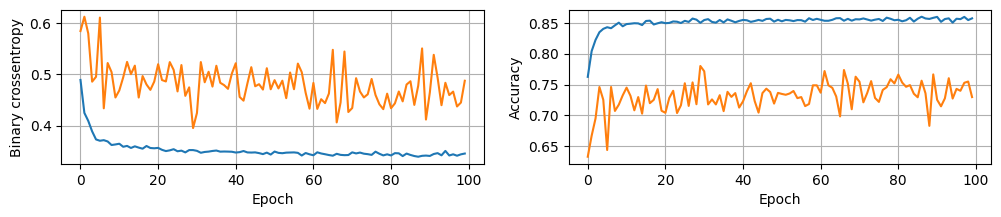

119/119 [==============================] - 0s 750us/step - loss: 0.3069 - accuracy: 0.8746
16 nodes, dropout 0.2, lr 0.005, batch size 32


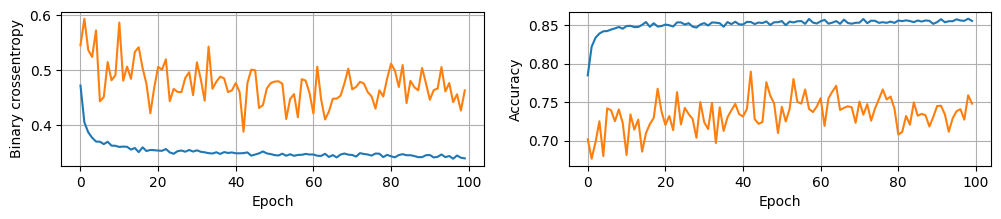

119/119 [==============================] - 0s 840us/step - loss: 0.3063 - accuracy: 0.8725
16 nodes, dropout 0.2, lr 0.005, batch size 64


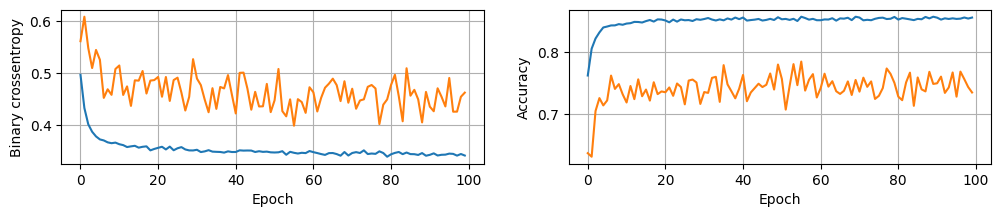

119/119 [==============================] - 0s 872us/step - loss: 0.3044 - accuracy: 0.8820
16 nodes, dropout 0.2, lr 0.005, batch size 128


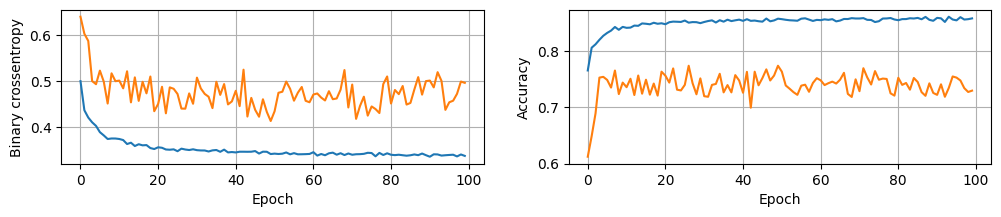

119/119 [==============================] - 0s 1ms/step - loss: 0.3000 - accuracy: 0.8812
16 nodes, dropout 0.2, lr 0.001, batch size 32


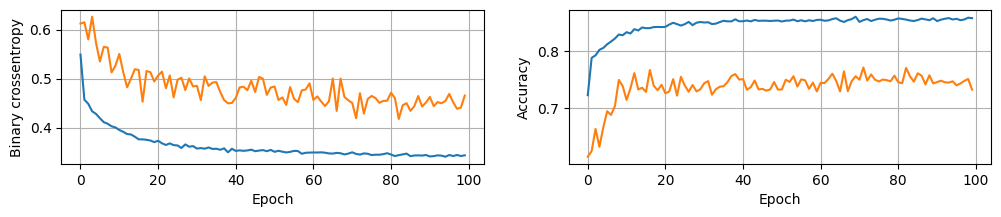

119/119 [==============================] - 0s 792us/step - loss: 0.3061 - accuracy: 0.8764
16 nodes, dropout 0.2, lr 0.001, batch size 64


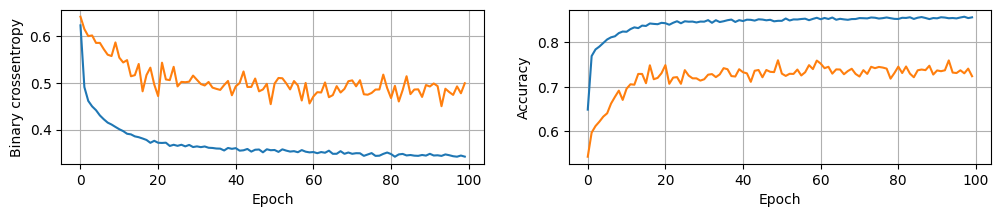

119/119 [==============================] - 0s 891us/step - loss: 0.3018 - accuracy: 0.8799
16 nodes, dropout 0.2, lr 0.001, batch size 128


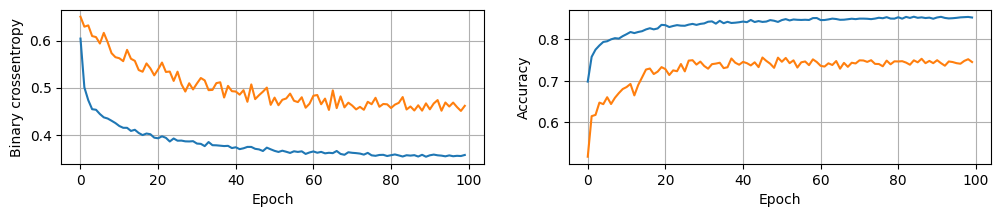

119/119 [==============================] - 0s 803us/step - loss: 0.3109 - accuracy: 0.8743
32 nodes, dropout 0, lr 0.01, batch size 32


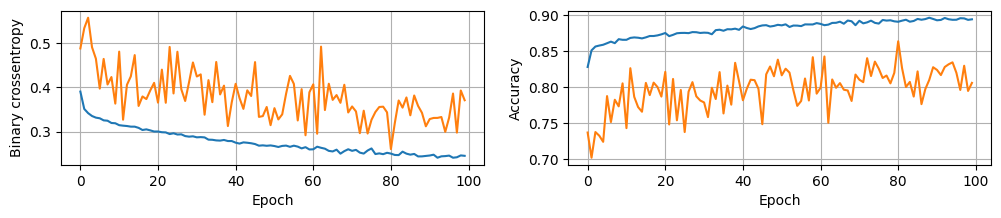

119/119 [==============================] - 0s 777us/step - loss: 0.3662 - accuracy: 0.8657
32 nodes, dropout 0, lr 0.01, batch size 64


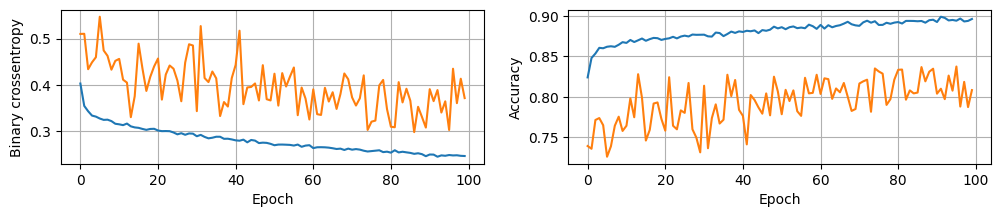

119/119 [==============================] - 0s 896us/step - loss: 0.3636 - accuracy: 0.8743
32 nodes, dropout 0, lr 0.01, batch size 128


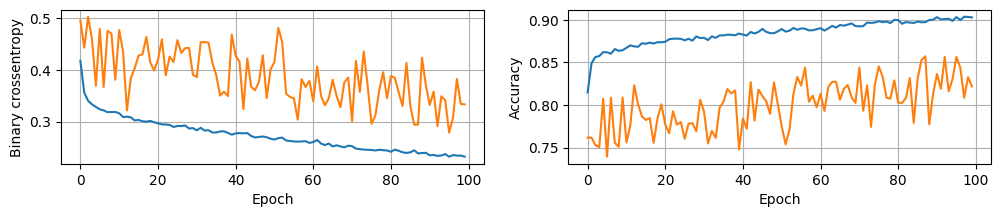

119/119 [==============================] - 0s 792us/step - loss: 0.3546 - accuracy: 0.8683
32 nodes, dropout 0, lr 0.005, batch size 32


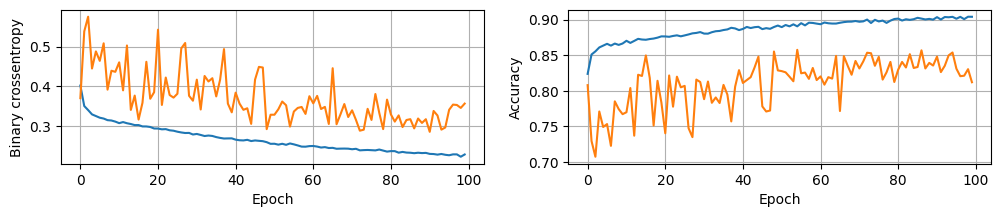

119/119 [==============================] - 0s 860us/step - loss: 0.3822 - accuracy: 0.8609
32 nodes, dropout 0, lr 0.005, batch size 64


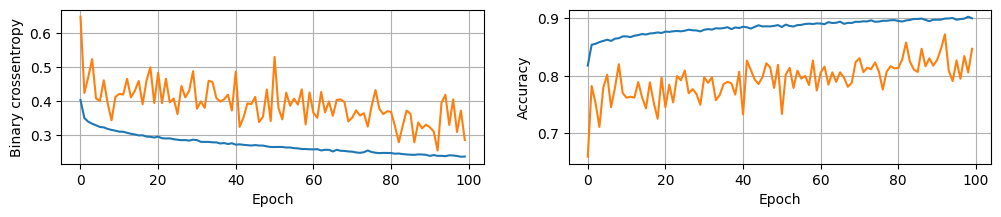

119/119 [==============================] - 0s 770us/step - loss: 0.3674 - accuracy: 0.8570
32 nodes, dropout 0, lr 0.005, batch size 128


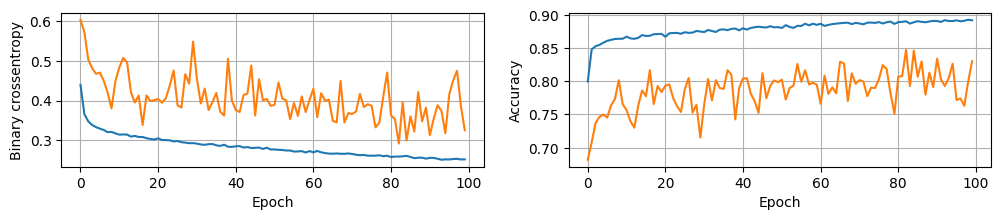

119/119 [==============================] - 0s 799us/step - loss: 0.3324 - accuracy: 0.8699
32 nodes, dropout 0, lr 0.001, batch size 32


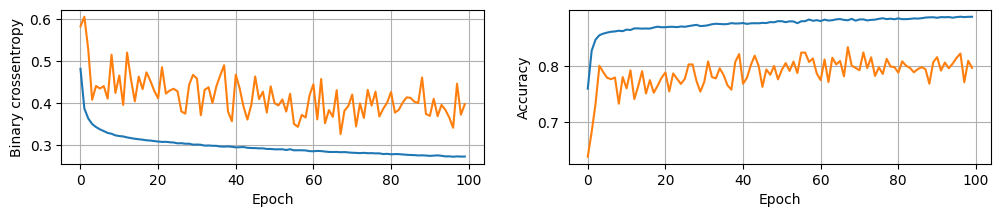

119/119 [==============================] - 0s 975us/step - loss: 0.3099 - accuracy: 0.8754
32 nodes, dropout 0, lr 0.001, batch size 64


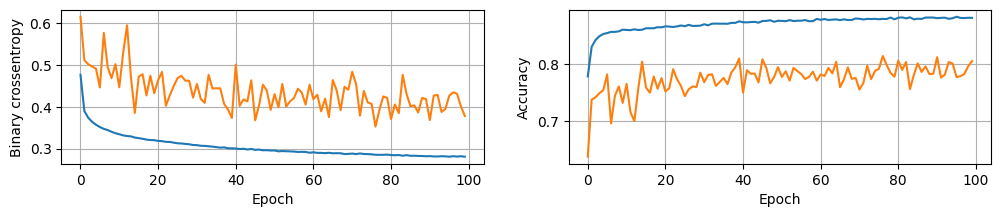

119/119 [==============================] - 0s 849us/step - loss: 0.3062 - accuracy: 0.8762
32 nodes, dropout 0, lr 0.001, batch size 128


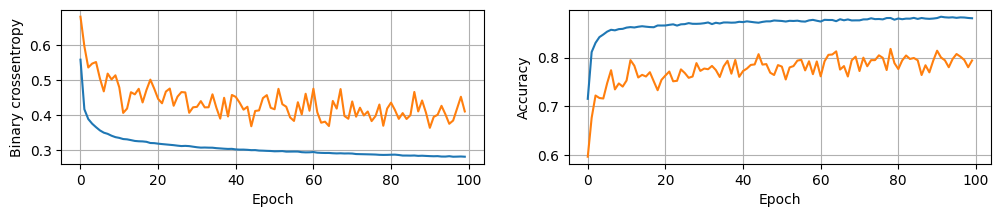

119/119 [==============================] - 0s 812us/step - loss: 0.2946 - accuracy: 0.8793
32 nodes, dropout 0.2, lr 0.01, batch size 32


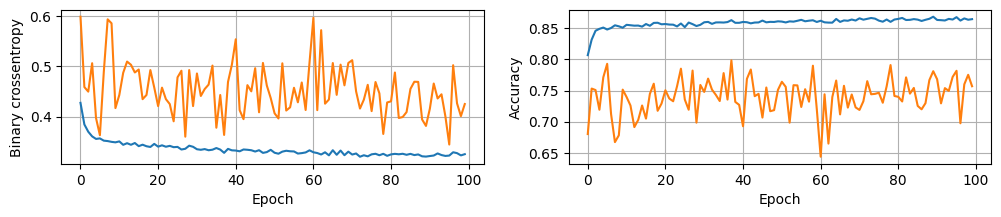

119/119 [==============================] - 0s 855us/step - loss: 0.3039 - accuracy: 0.8812
32 nodes, dropout 0.2, lr 0.01, batch size 64


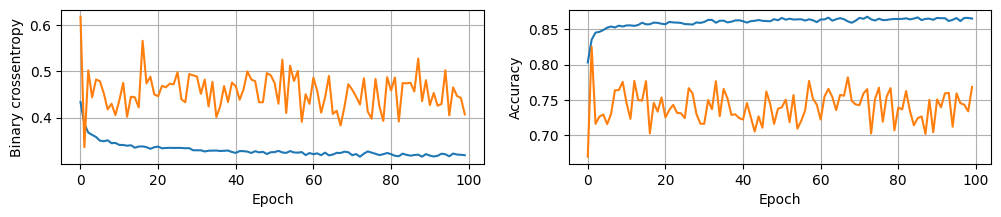

119/119 [==============================] - 0s 809us/step - loss: 0.3049 - accuracy: 0.8796
32 nodes, dropout 0.2, lr 0.01, batch size 128


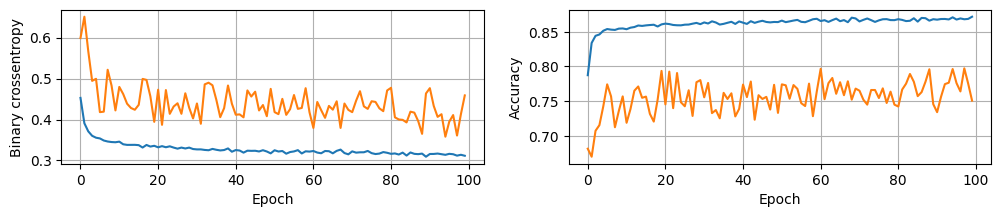

119/119 [==============================] - 0s 771us/step - loss: 0.2945 - accuracy: 0.8814
32 nodes, dropout 0.2, lr 0.005, batch size 32


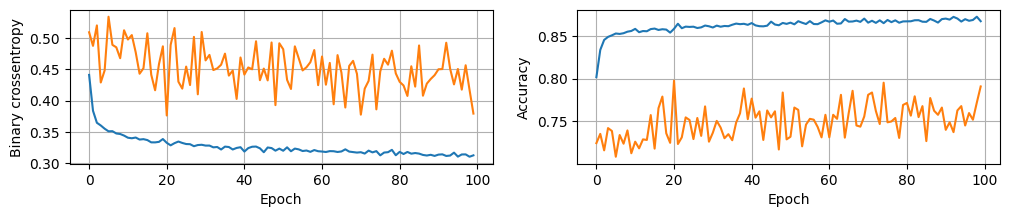

119/119 [==============================] - 0s 762us/step - loss: 0.3045 - accuracy: 0.8791
32 nodes, dropout 0.2, lr 0.005, batch size 64


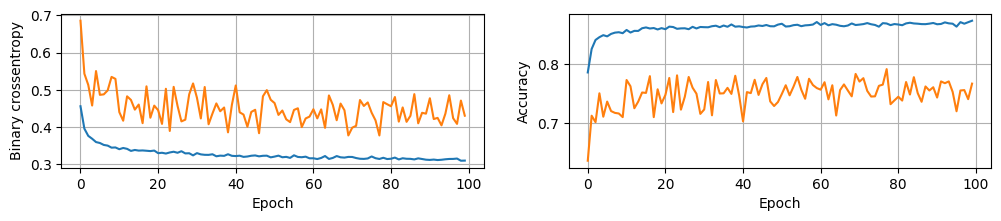

119/119 [==============================] - 0s 829us/step - loss: 0.2937 - accuracy: 0.8767
32 nodes, dropout 0.2, lr 0.005, batch size 128


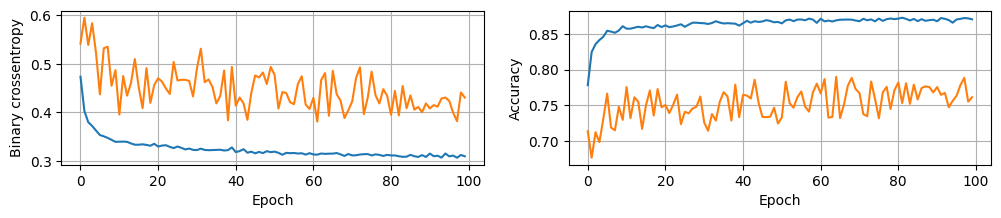

119/119 [==============================] - 0s 878us/step - loss: 0.2903 - accuracy: 0.8828
32 nodes, dropout 0.2, lr 0.001, batch size 32


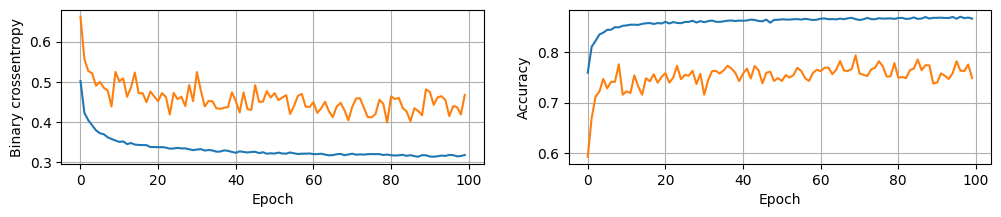

119/119 [==============================] - 0s 909us/step - loss: 0.2910 - accuracy: 0.8785
32 nodes, dropout 0.2, lr 0.001, batch size 64


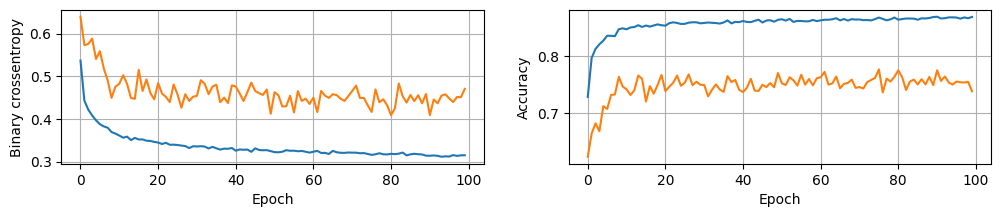

119/119 [==============================] - 0s 919us/step - loss: 0.2878 - accuracy: 0.8846
32 nodes, dropout 0.2, lr 0.001, batch size 128


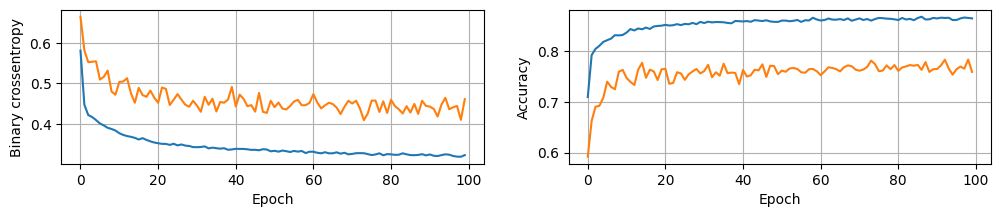

119/119 [==============================] - 0s 944us/step - loss: 0.2887 - accuracy: 0.8843
64 nodes, dropout 0, lr 0.01, batch size 32


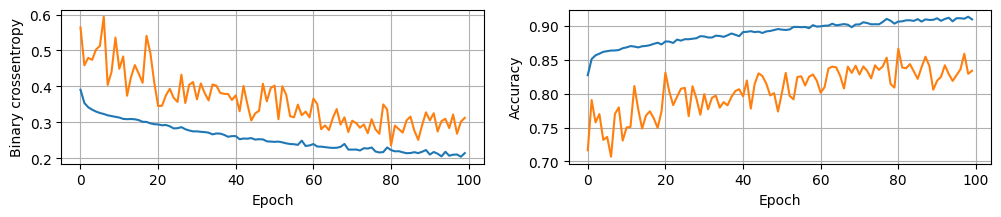

119/119 [==============================] - 0s 811us/step - loss: 0.4493 - accuracy: 0.8657
64 nodes, dropout 0, lr 0.01, batch size 64


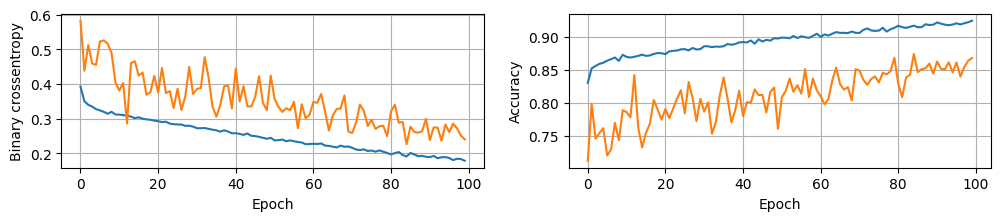

119/119 [==============================] - 0s 884us/step - loss: 0.4899 - accuracy: 0.8609
64 nodes, dropout 0, lr 0.01, batch size 128


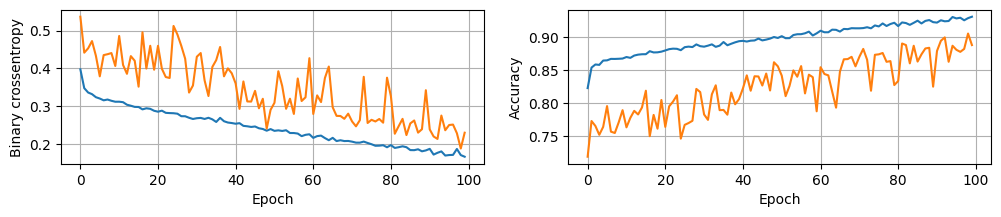

119/119 [==============================] - 0s 837us/step - loss: 0.4741 - accuracy: 0.8557
64 nodes, dropout 0, lr 0.005, batch size 32


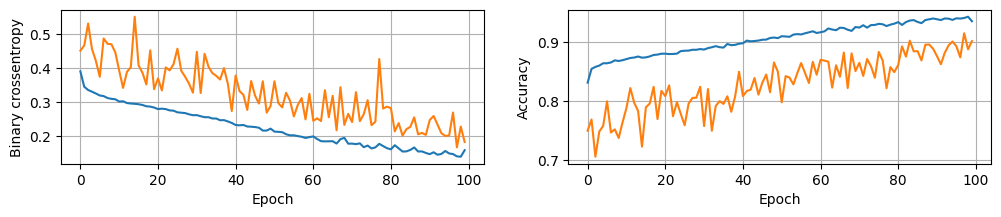

119/119 [==============================] - 0s 940us/step - loss: 0.6083 - accuracy: 0.8475
64 nodes, dropout 0, lr 0.005, batch size 64


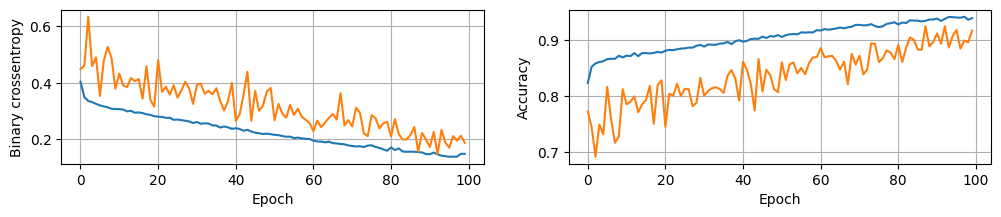

119/119 [==============================] - 0s 854us/step - loss: 0.5212 - accuracy: 0.8552
64 nodes, dropout 0, lr 0.005, batch size 128


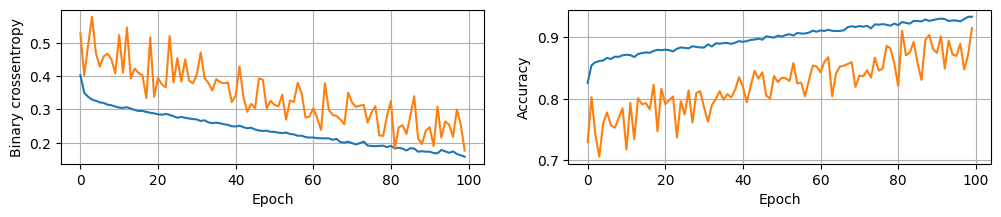

119/119 [==============================] - 0s 849us/step - loss: 0.4435 - accuracy: 0.8604
64 nodes, dropout 0, lr 0.001, batch size 32


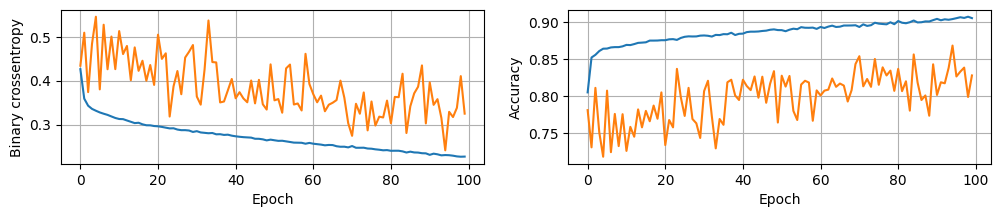

119/119 [==============================] - 0s 866us/step - loss: 0.3197 - accuracy: 0.8751
64 nodes, dropout 0, lr 0.001, batch size 64


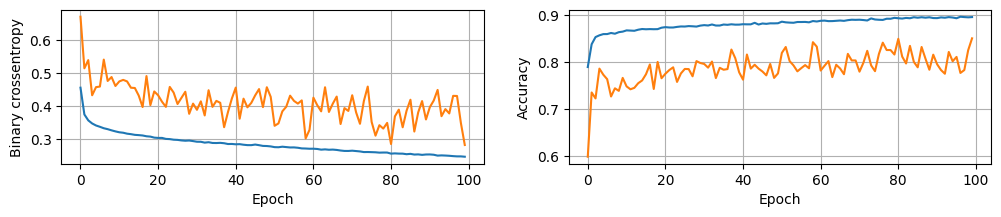

119/119 [==============================] - 0s 851us/step - loss: 0.3262 - accuracy: 0.8636
64 nodes, dropout 0, lr 0.001, batch size 128


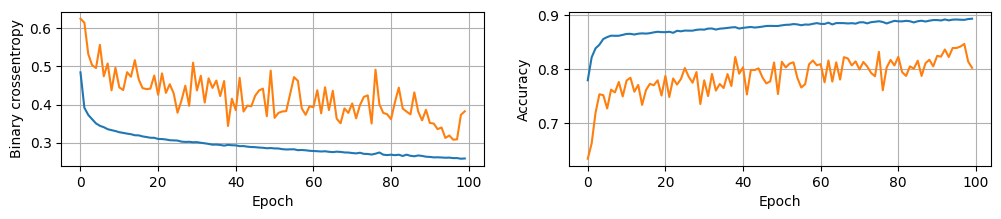

119/119 [==============================] - 0s 875us/step - loss: 0.3073 - accuracy: 0.8736
64 nodes, dropout 0.2, lr 0.01, batch size 32


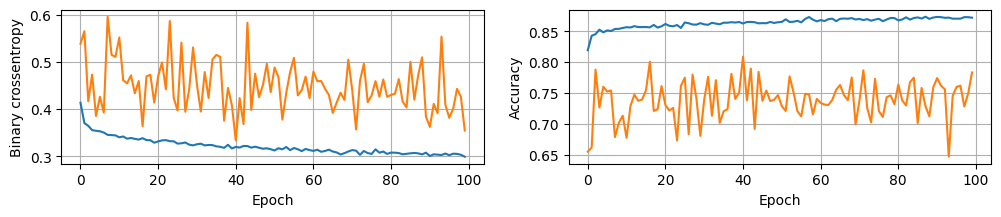

119/119 [==============================] - 0s 883us/step - loss: 0.3079 - accuracy: 0.8817
64 nodes, dropout 0.2, lr 0.01, batch size 64


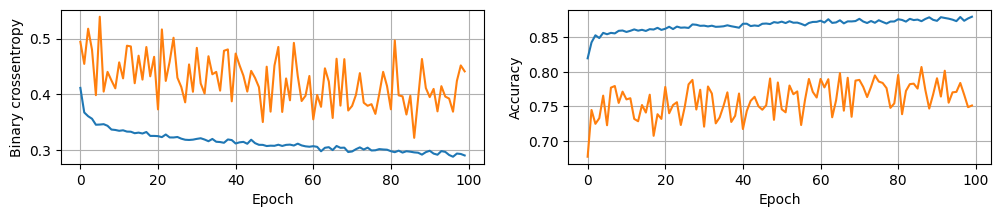

119/119 [==============================] - 0s 1ms/step - loss: 0.2911 - accuracy: 0.8838
64 nodes, dropout 0.2, lr 0.01, batch size 128


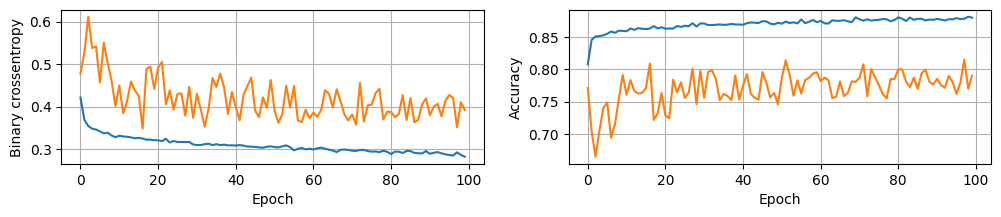

119/119 [==============================] - 0s 882us/step - loss: 0.2936 - accuracy: 0.8799
64 nodes, dropout 0.2, lr 0.005, batch size 32


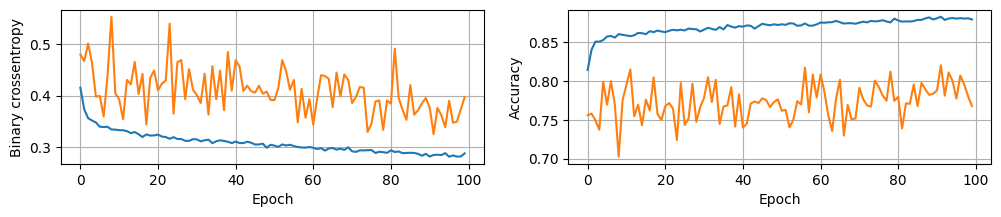

119/119 [==============================] - 0s 929us/step - loss: 0.2892 - accuracy: 0.8793
64 nodes, dropout 0.2, lr 0.005, batch size 64


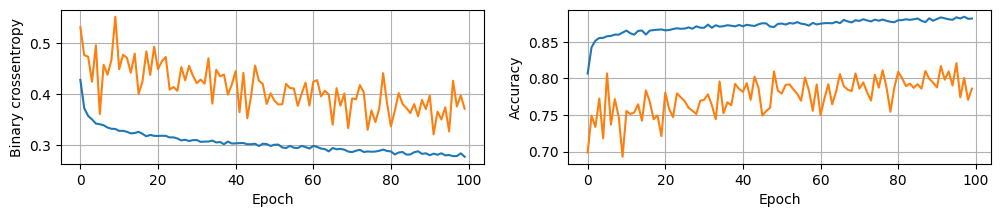

119/119 [==============================] - 0s 819us/step - loss: 0.2899 - accuracy: 0.8841
64 nodes, dropout 0.2, lr 0.005, batch size 128


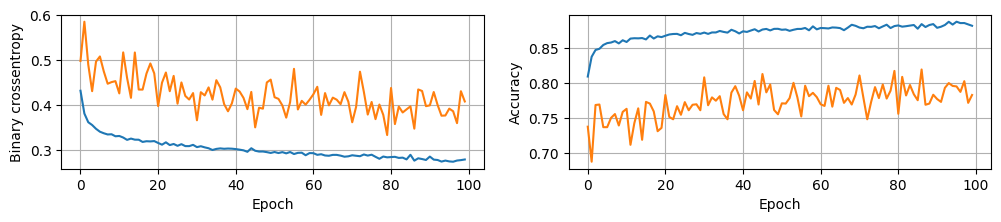

119/119 [==============================] - 0s 784us/step - loss: 0.2891 - accuracy: 0.8856
64 nodes, dropout 0.2, lr 0.001, batch size 32


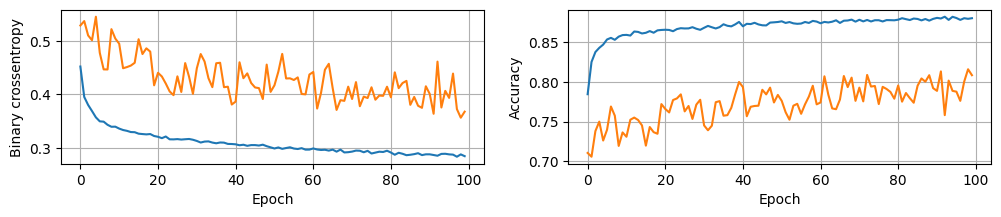

119/119 [==============================] - 0s 931us/step - loss: 0.2819 - accuracy: 0.8872
64 nodes, dropout 0.2, lr 0.001, batch size 64


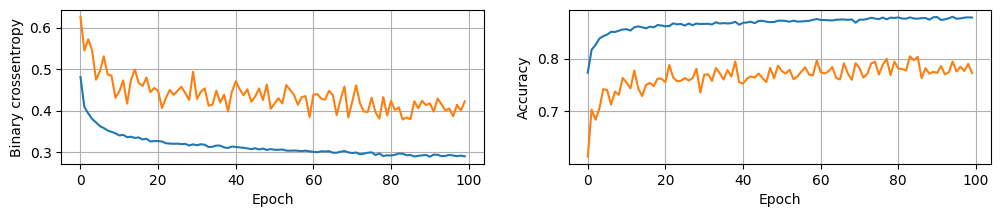

119/119 [==============================] - 0s 794us/step - loss: 0.2867 - accuracy: 0.8793
64 nodes, dropout 0.2, lr 0.001, batch size 128


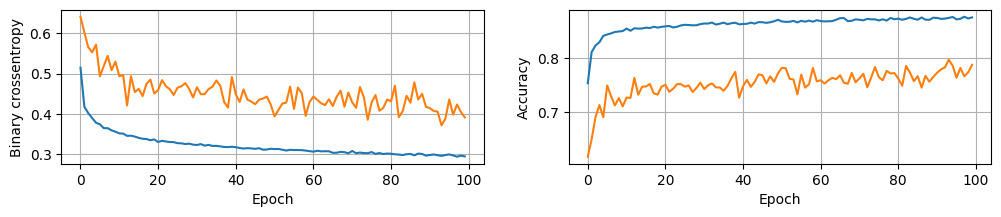

119/119 [==============================] - 0s 1ms/step - loss: 0.2842 - accuracy: 0.8846


In [78]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_val_model = model

In [82]:
y_pred = least_val_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
y_pred

119/119 [==============================] - 0s 827us/step


array([0, 1, 1, ..., 1, 0, 1])

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1338
           1       0.88      0.94      0.91      2466

    accuracy                           0.88      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.88      0.88      0.87      3804

